In [25]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report,confusion_matrix

In [26]:
df = pd.read_csv('C:\\dlsrhdwlsmdrofhs\\car_evaluation.csv', header = None)
df.head()

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [27]:
df.columns = ['price', 'maint', 'doors', 'person', 'lug_capacity', 'safaty', 'output']
df.head()

,price,maint,doors,person,lug_capacity,safaty,output
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [ ]:
df.isnull().sum()

price           0
maint           0
doors           0
person          0
lug_capacity    0
safaty          0
output          0
dtype: int64

In [29]:
df['output'].value_counts()

output
unacc    1210
acc       384
good       69
vgood      65
Name: count, dtype: int64

In [30]:
label_encoders = {}
for column in df.columns:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])
df.head()

,price,maint,doors,person,lug_capacity,safaty,output
0,3,3,0,0,2,1,2
1,3,3,0,0,2,2,2
2,3,3,0,0,2,0,2
3,3,3,0,0,1,1,2
4,3,3,0,0,1,2,2


In [31]:
df['output'].value_counts()

output
2    1210
0     384
1      69
3      65
Name: count, dtype: int64

In [35]:
X = df.drop(columns = ['output']).values
y = df['output'].values
X

array([[3, 3, 0, 0, 2, 1],
       [3, 3, 0, 0, 2, 2],
       [3, 3, 0, 0, 2, 0],
       ...,
       [1, 1, 3, 2, 0, 1],
       [1, 1, 3, 2, 0, 2],
       [1, 1, 3, 2, 0, 0]])

In [36]:
Y = pd.get_dummies(y).values
Y

array([[False, False,  True, False],
       [False, False,  True, False],
       [False, False,  True, False],
       ...,
       [False, False,  True, False],
       [False,  True, False, False],
       [False, False, False,  True]])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 1557)
print("학습 데이터 개수:", len(X_train))
print("테스트 데이터 개수:", len(X_test))

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

학습 데이터 개수: 1382
테스트 데이터 개수: 346
(1382, 6) (346, 6)
(1382, 4) (346, 4)


In [38]:
model = Sequential()

model.add(Dense(10, input_shape = (6, ), activation = 'relu'))
model.add(Dense(8, activation = 'relu'))
model.add(Dense(6, activation = 'relu'))
model.add(Dense(4, activation = 'softmax'))

model.compile(Adam(learning_rate = 0.04), loss = 'categorical_crossentropy', metrics = ['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                70        
                                                                 
 dense_1 (Dense)             (None, 8)                 88        
                                                                 
 dense_2 (Dense)             (None, 6)                 54        
                                                                 
 dense_3 (Dense)             (None, 4)                 28        
                                                                 
Total params: 240
Trainable params: 240
Non-trainable params: 0
_________________________________________________________________


In [39]:
model_history = model.fit(X_train, y_train, epochs = 30, batch_size = 32, validation_split = 0.1)

Epoch 1/30
39/39 [==============================] - 1s 10ms/step - loss: 0.7508 - accuracy: 0.6782 - val_loss: 0.7095 - val_accuracy: 0.6547
Epoch 2/30
39/39 [==============================] - 0s 2ms/step - loss: 0.5848 - accuracy: 0.7385 - val_loss: 0.6095 - val_accuracy: 0.7338
Epoch 3/30
39/39 [==============================] - 0s 2ms/step - loss: 0.4389 - accuracy: 0.8182 - val_loss: 0.5460 - val_accuracy: 0.7914
Epoch 4/30
39/39 [==============================] - 0s 2ms/step - loss: 0.3853 - accuracy: 0.8302 - val_loss: 0.5335 - val_accuracy: 0.7698
Epoch 5/30
39/39 [==============================] - 0s 2ms/step - loss: 0.3205 - accuracy: 0.8689 - val_loss: 0.3964 - val_accuracy: 0.8417
Epoch 6/30
39/39 [==============================] - 0s 2ms/step - loss: 0.2830 - accuracy: 0.8809 - val_loss: 0.3298 - val_accuracy: 0.8561
Epoch 7/30
39/39 [==============================] - 0s 2ms/step - loss: 0.2245 - accuracy: 0.9059 - val_loss: 0.3117 - val_accuracy: 0.8633
Epoch 8/30
39/39 [=

In [40]:
y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test, axis = 1)
y_pred_class = np.argmax(y_pred, axis = 1)

11/11 [==============================] - 0s 2ms/step


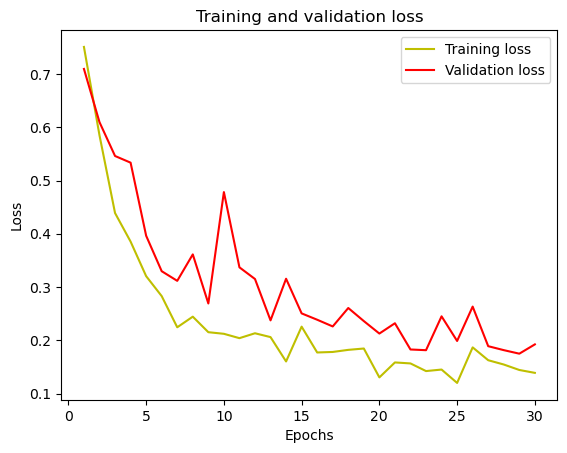

In [41]:
loss = model_history.history['loss']
val_loss =model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

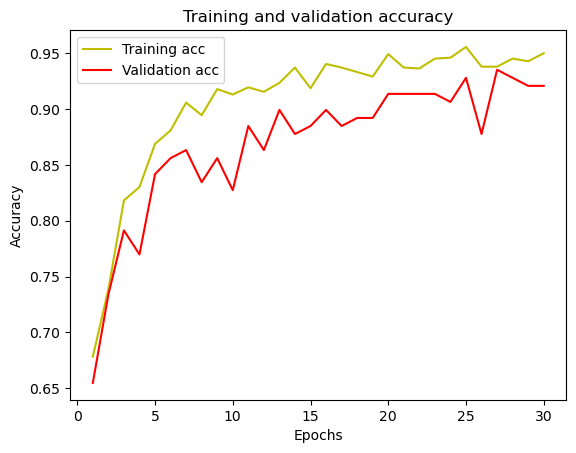

In [42]:
acc =model_history.history['accuracy']
val_acc =model_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [43]:
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       0.98      0.88      0.93        69
           1       0.63      0.80      0.71        15
           2       0.99      1.00      0.99       251
           3       0.85      1.00      0.92        11

    accuracy                           0.97       346
   macro avg       0.86      0.92      0.89       346
weighted avg       0.97      0.97      0.97       346

[[ 61   6   2   0]
 [  1  12   0   2]
 [  0   1 250   0]
 [  0   0   0  11]]
